In [3]:
#Importing all the libraries and packages required
import pandas as pd
import numpy as np
import re
import string
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [5]:
# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary

In [6]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    return text

df['clean_message'] = df['message'].apply(preprocess_text)

In [7]:
# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

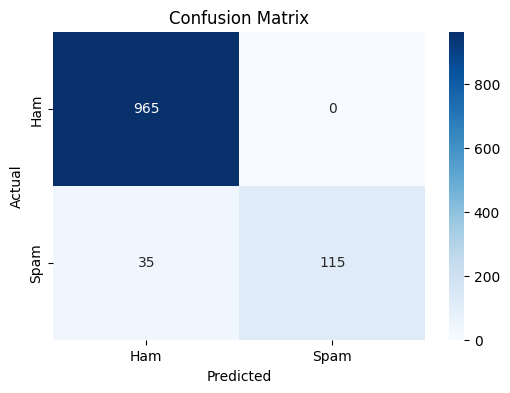

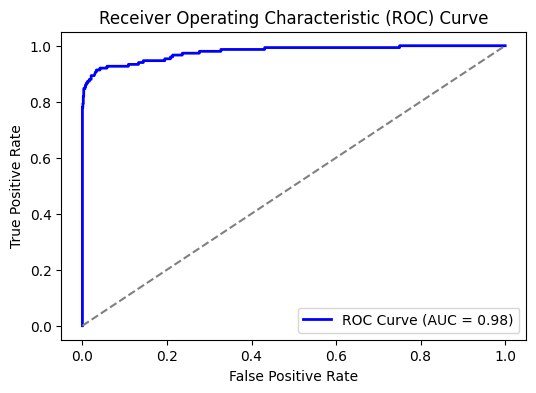

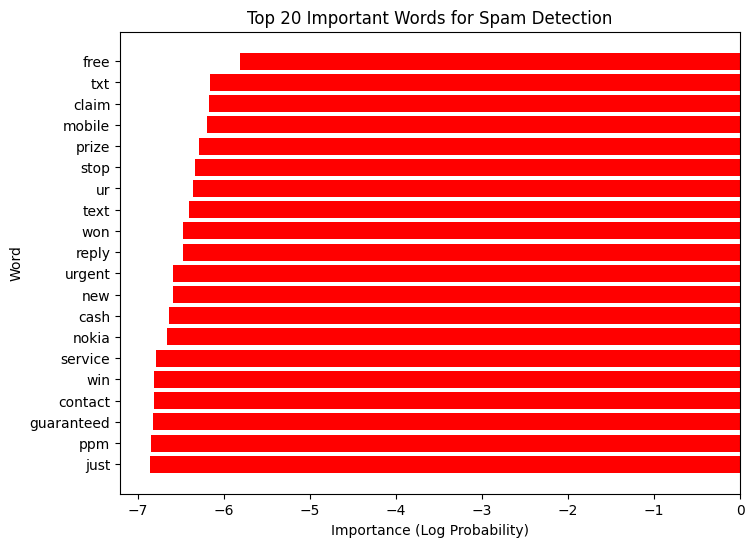

In [11]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature Importance (Top Words in Spam Detection)
feature_names = np.array(vectorizer.get_feature_names_out())
spam_weights = model.feature_log_prob_[1]  # Get Naïve Bayes feature log probabilities for spam
sorted_indices = np.argsort(spam_weights)[-20:]  # Top 20 words

plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_indices], spam_weights[sorted_indices], color='red')
plt.xlabel("Importance (Log Probability)")
plt.ylabel("Word")
plt.title("Top 20 Important Words for Spam Detection")
plt.show()

# Save Model & Vectorizer
with open("spam_classifier.pkl", "wb") as f:
    pickle.dump(model, f)
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [12]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.97
Precision: 1.00
Recall: 0.77
F1 Score: 0.87
Confusion Matrix:
 [[965   0]
 [ 35 115]]
